In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "DENSE_NEURAL_NETWORK_CHANGE_THIS"

In [4]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'), ('optimal_v2', 'close')],
                            param_spec={},
                            optimal_threshold={'buy':0.8},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]}
                                    ],

                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi
dataset

Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from chunk 11...


,time,high,low,close,open,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
90,1502947979999,4320.00,4320.00,4319.996912,4320.00,0.048053,0.594297,0.0,0.476929,0.488858,...,0.430643,0.401906,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
91,1502948039999,4320.00,4320.00,4319.998456,4320.00,0.030719,0.594297,0.0,0.476929,0.488858,...,0.430630,0.401904,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
92,1502948099999,4320.00,4320.00,4319.999228,4320.00,0.179059,0.594297,0.0,0.476929,0.488858,...,0.430624,0.402986,0.478606,0.503770,0.494352,0.570287,0.204404,0.181143,0.174906,0.167805
93,1502948159999,4320.00,4320.00,4319.999614,4320.00,0.501599,0.594297,0.0,0.476929,0.488858,...,0.430881,0.397691,0.478606,0.503770,0.497380,0.513006,0.204404,0.181143,0.175860,0.150353
94,1502948219999,4320.00,4320.00,4319.999807,4320.00,0.019386,0.594297,0.0,0.476929,0.488858,...,0.430749,0.395053,0.478606,0.503770,0.495070,0.513006,0.204404,0.181143,0.175132,0.150353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,1606715999999,18524.07,18515.78,18519.207620,18516.15,5.437391,0.492830,0.0,0.476624,0.487401,...,0.425569,0.387816,0.477448,0.506112,0.465718,0.456943,0.203943,0.181977,0.164825,0.131905
1722409,1606719659999,18559.77,18512.90,18523.983810,18520.27,65.068932,0.501578,0.0,0.476442,0.486870,...,0.426304,0.388045,0.494979,0.506802,0.473094,0.472400,0.210987,0.182209,0.167435,0.136492
1722410,1606719719999,18530.08,18523.66,18525.301905,18528.89,15.367476,0.499362,0.0,0.476460,0.486943,...,0.428349,0.388864,0.492955,0.510220,0.494905,0.485892,0.210179,0.183429,0.175072,0.140253
1722411,1606719779999,18530.08,18520.47,18526.950952,18526.62,54.298657,0.501485,0.0,0.476483,0.487035,...,0.429491,0.388718,0.489399,0.518775,0.496661,0.478026,0.208712,0.186509,0.175710,0.138068


In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
90,4319.996912,0.594297,0.0,0.476929,0.488858,0.498613,0.643434,0.933333,0.724138,0.568363,...,0.430643,0.401906,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
91,4319.998456,0.594297,0.0,0.476929,0.488858,0.498774,0.643497,0.933333,0.724138,0.568168,...,0.430630,0.401904,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
92,4319.999228,0.594297,0.0,0.476929,0.488858,0.498855,0.643529,0.933333,0.724138,0.568071,...,0.430624,0.402986,0.478606,0.503770,0.494352,0.570287,0.204404,0.181143,0.174906,0.167805
93,4319.999614,0.594297,0.0,0.476929,0.488858,0.498936,0.643545,0.933333,0.724138,0.585979,...,0.430881,0.397691,0.478606,0.503770,0.497380,0.513006,0.204404,0.181143,0.175860,0.150353
94,4319.999807,0.594297,0.0,0.476929,0.488858,0.498936,0.643552,0.933333,0.724138,0.585979,...,0.430749,0.395053,0.478606,0.503770,0.495070,0.513006,0.204404,0.181143,0.175132,0.150353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,18519.207620,0.492830,0.0,0.476624,0.487401,0.429327,0.055142,0.909239,0.392106,0.390700,...,0.425569,0.387816,0.477448,0.506112,0.465718,0.456943,0.203943,0.181977,0.164825,0.131905
1722409,18523.983810,0.501578,0.0,0.476442,0.486870,0.436562,0.109340,1.000000,1.000000,0.599634,...,0.426304,0.388045,0.494979,0.506802,0.473094,0.472400,0.210987,0.182209,0.167435,0.136492
1722410,18525.301905,0.499362,0.0,0.476460,0.486943,0.438859,0.122343,0.680400,0.629556,0.529613,...,0.428349,0.388864,0.492955,0.510220,0.494905,0.485892,0.210179,0.183429,0.175072,0.140253
1722411,18526.950952,0.501485,0.0,0.476483,0.487035,0.441733,0.138611,0.479043,0.561493,0.537898,...,0.429491,0.388718,0.489399,0.518775,0.496661,0.478026,0.208712,0.186509,0.175710,0.138068


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,CCI_close_period_30,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
0,3877.992425,0.523197,0.476644,0.487694,0.467943,0.716450,0.876996,0.700982,0.625729,0.569990,...,0.431405,0.397236,0.495469,0.532392,0.522852,0.591103,0.210950,0.191211,0.185282,0.176371
1,14874.434072,0.571187,0.476635,0.487822,0.484422,0.867645,1.000000,0.987054,0.645976,0.587674,...,0.469307,0.451232,0.489669,0.517878,0.556397,0.644013,0.208360,0.185653,0.196965,0.196724
2,10590.772809,0.319350,0.476606,0.487177,0.444857,0.116412,0.333333,0.155647,0.238533,0.440776,...,0.403063,0.321045,0.450839,0.445247,0.459444,0.381606,0.189575,0.155012,0.158058,0.099738
3,6458.769354,0.472260,0.476612,0.486909,0.437775,0.176423,0.354830,0.228463,0.277077,0.377589,...,0.427075,0.390287,0.448226,0.464618,0.469058,0.481412,0.192355,0.167549,0.165637,0.137963
4,5273.624693,0.432247,0.476469,0.487584,0.437450,0.223717,0.333333,0.420968,0.392182,0.417413,...,0.421739,0.393077,0.476404,0.491389,0.436797,0.550200,0.203429,0.176348,0.153536,0.160826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228650,9647.180140,0.567965,0.476688,0.488086,0.481117,0.830231,1.000000,0.872477,0.779566,0.603864,...,0.436882,0.402687,0.542300,0.581883,0.588844,0.654045,0.228842,0.208541,0.210479,0.201462
228651,3820.378005,0.512118,0.476379,0.487798,0.483669,0.830273,0.396774,0.615542,0.607635,0.557531,...,0.435079,0.396141,0.475938,0.527273,0.555501,0.562657,0.203376,0.189503,0.198883,0.165603
228652,8896.724454,0.484560,0.476540,0.487047,0.442113,0.310081,0.333333,0.059039,0.210640,0.421741,...,0.423657,0.389260,0.435670,0.454275,0.461249,0.477889,0.187986,0.164536,0.163179,0.137400
228653,9245.746518,0.500056,0.476387,0.486728,0.436327,0.624193,0.375349,0.327709,0.400065,0.514821,...,0.429473,0.398546,0.478091,0.504788,0.494415,0.589730,0.204201,0.181501,0.174894,0.176342


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [7]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
callbacks = []

#stop model from training when it starts to get bad
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                min_delta=0, 
                                patience=2, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks.append(early_stop)


# getting the model_version name for the model checkpoint callback
# keep is_nn to false here so it doesn't save the model just yet
version_number = nu.exportModel(model, model_name, False, indicators, features, proba_threshold=0.0, is_nn=False, save_model=False)

#saving model when validation accuracy gets better
checkpoint_call = tf.keras.callbacks.ModelCheckpoint(f'./v2/strategy/saved_models/{model_name}/{version_number}', 
                                     monitor='val_accuracy', 
                                     verbose=0, 
                                     save_best_only=True,
                                     save_weights_only=False, 
                                     mode='auto', 
                                     save_freq='epoch')
callbacks.append(checkpoint_call)

if not os.path.isdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs'):
    os.mkdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs')
tensorb = tf.keras.callbacks.TensorBoard(log_dir=f'./v2/strategy/saved_models/{model_name}/{version_number}/logs',
                                 histogram_freq=0, 
                                 write_graph=True, 
                                 write_images=False,    
                                 update_freq='epoch', 
                                 profile_batch=2, 
                                 embeddings_freq=0,    
                                 embeddings_metadata=None)
callbacks.append(tensorb)

In [13]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, callbacks=callbacks, epochs=20, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/40
7143/7146 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7324WARNING:tensorflow:From /usr/local/lib/python3.8/site-packages/tensorflow/python/ops/resource_variable_ops.py:1813: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/DENSE_NEURAL_NETWORK_CHANGE_THIS/1_0/assets
7146/7146 [==============================] - 22s 3ms/step - loss: 0.4348 - accuracy: 0.7324 - val_loss: 0.4531 - val_accuracy: 0.7020
Epoch 2/40
7146/7146 [==============================] - 23s 3ms/step - loss: 0.4185 - accuracy: 0.7368 - val_loss: 0.4060 - val_accuracy: 0.7132
Epoch 3/40
7146/7146 [==============================] - 19s 3ms/step - loss: 0.4132 - accuracy: 0.7408 - val_loss: 0.4709 - val_accuracy: 0.7131
Epoch 4/40
7146/

KeyboardInterrupt: 

In [5]:
model = tf.keras.models.load_model(f'./v2/strategy/saved_models/{model_name}/1_1')
model

In [18]:
reduced_classified_data = nu.classifyPoints(model, testX, predict_proba=False, proba_thresh=0.75, plot_optimal=True, optimal=testy, is_nn=True)

In [19]:
smaller_view_data = reduced_classified_data[4000:6000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

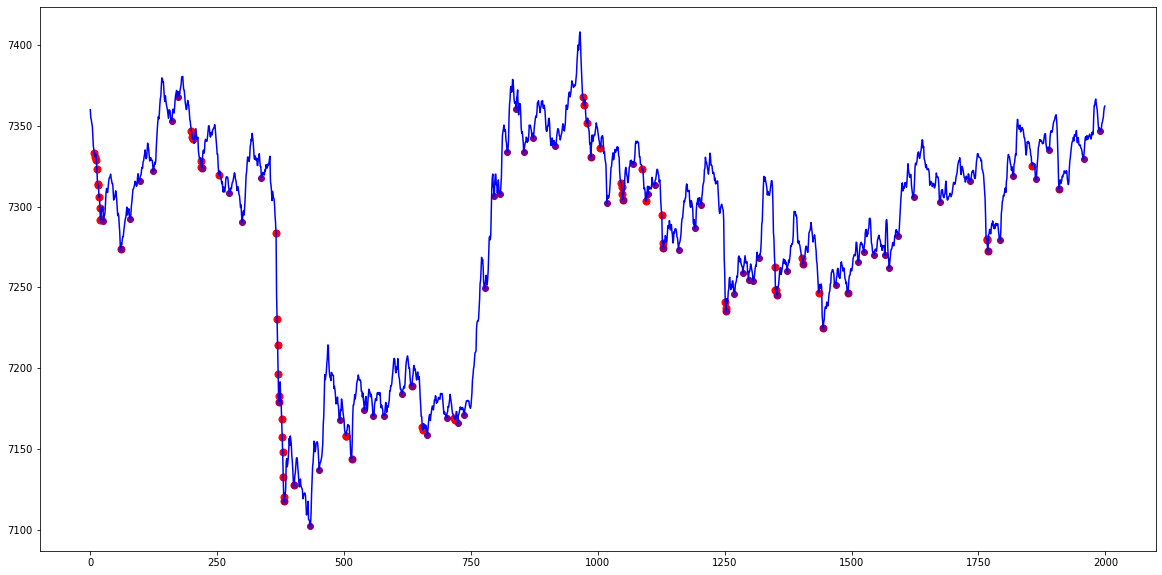

In [20]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [8]:
model_version = nu.exportModel(model, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.75, is_nn=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/DENSE_NEURAL_NETWORK_CHANGE_THIS/1_2/assets


In [3]:
score, trades = nu.testModel(model_name, num_processes=4)

Importing Strategies...
Generating Model Data...
Preprocessing Model Predictions...
14725it [00:00, 147246.98it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 149878.07it/s]
Generating Report...
